In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics

In [2]:
data = pd.read_csv( r"C:dataset_sdn.csv")

In [3]:
data

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0


In [4]:
data.shape

(104345, 23)

In [5]:
class Model:
    global y
    
    def __init__(self, X_train, y_train, X_eval_data, y_eval):
        scaler = preprocessing.StandardScaler()
        self.X_train = scaler.fit_transform(X_train)
        self.y_train = y_train
        self.X_test = scaler.transform(X_eval_data)
        self.y_test = y_eval 
        
        self.accuracy_lr = 0
        self.accuracy_svm = 0
        self.accuracy_rf = 0
        self.accuracy_gbc = 0

    def LogisticRegression(self):
        solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

        start_time = time.time()
        results_lr = []
        accuracy_list = []
        for solver in solvers:
            LR = LogisticRegression(C=0.03, solver=solver).fit(self.X_train, self.y_train)
            predicted_lr = LR.predict(self.X_test)
            accuracy_lr = accuracy_score(self.y_test, predicted_lr)
            
            results_lr.append({'solver': solver, 'accuracy': f"{round(accuracy_lr * 100, 2)}%",
                               'Coefficients': {'W': LR.coef_, 'b': LR.intercept_}})
            
            accuracy_list.append(accuracy_lr)
       
        solver_name = solvers[accuracy_list.index(max(accuracy_list))]
        LR = LogisticRegression(C=0.03, solver=solver_name).fit(self.X_train, self.y_train)
        predicted_lr = LR.predict(self.X_test)
        accuracy_lr = accuracy_score(self.y_test, predicted_lr)
        print(f"Accuracy of LR model is: {round(accuracy_lr * 100, 2)}%", '\n')
        print("########################################################################")
        print('Best solver is:', solver_name)
        print("########################################################################")
        print(classification_report(predicted_lr, self.y_test), '\n')
        print("########################################################################")
        print("--- %s seconds --- time for LogisticRegression" % (time.time() - start_time))
        self.accuracy_lr = accuracy_lr
        
    def SupportVectorMachine(self):
        start_time = time.time()
        accuracy_list = []
        result_svm = []
        kernels = ['linear', 'poly', 'rbf', 'sigmoid']

        for kernel in kernels:
            SVM = svm.SVC(kernel=kernel).fit(self.X_train, self.y_train)
            predicted_svm = SVM.predict(self.X_test)
            accuracy_svm = accuracy_score(self.y_test, predicted_svm)
            result_svm.append({"kernel": kernel, "accuracy": f"{round(accuracy_svm * 100, 2)}%"})
            print("Accuracy: %.2f%%" % round((accuracy_svm * 100.0), 2))
            print('######################################################################')
            accuracy_list.append(accuracy_svm)

        kernel_name = kernels[accuracy_list.index(max(accuracy_list))]
        SVM = svm.SVC(kernel=kernel_name).fit(self.X_train, self.y_train)
        predicted_svm = SVM.predict(self.X_test)
        accuracy_svm = accuracy_score(self.y_test, predicted_svm)
        print(f"Accuracy of SVM model {round(accuracy_svm, 2) * 100}%", '\n')
        print("########################################################################")
        print('Best kernel is:', kernel_name)
        print("########################################################################")
        print(classification_report(predicted_svm, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))
        self.accuracy_svm = accuracy_svm 

    def RandomForest(self):
        start_time = time.time()
    
        param_grid = {
    'n_estimators': [100, 200, 500],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 3, 4, 5, 6]  # Include 'None' for unlimited depth
}


        rf_base = RandomForestClassifier(criterion='gini', 
                                      oob_score=True,
                                      random_state=1,
                                      n_jobs=-1)

        rf_search = GridSearchCV(rf_base, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
        rf_search.fit(self.X_train, self.y_train)
    
        best_rf = rf_search.best_estimator_
        predicted_rf = best_rf.predict(self.X_test)
        accuracy_rf = accuracy_score(self.y_test, predicted_rf)

        print(f"Accuracy of RF model is: {round(accuracy_rf * 100, 2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_rf, self.y_test))
        print("########################################################################")

        print("--- %s seconds ---" % (time.time() - start_time))
        self.accuracy_rf = accuracy_rf

    def GradientBoost(self):
        start_time = time.time()
        gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)
        gbc.fit(self.X_train, self.y_train)

        predicted_gbc = gbc.predict(self.X_test)
        accuracy_gbc = accuracy_score(self.y_test, predicted_gbc)
        print(f"Accuracy of Gradient Boosting model is: {round(accuracy_gbc * 100, 2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_gbc, self.y_test))
        print("########################################################################")

        print("--- %s seconds ---" % (time.time() - start_time))
        self.accuracy_gbc = accuracy_gbc
        
    def plot_accuracy(self, accuracies, model_names):
        plt.figure(figsize=(10, 6))
        plt.bar(model_names, accuracies, color='blue')
        plt.xlabel('Model')
        plt.ylabel('Accuracy')
        plt.title('Accuracy of Different Models')
        plt.ylim(0, 100)  # Set y-axis limit to be between 0 and 100 (percentage)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def run_models(self):
        self.LogisticRegression()
        self.SupportVectorMachine()
        self.RandomForest()
        self.GradientBoost()

        model_names = ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'Gradient Boosting']
        accuracies = [self.accuracy_lr * 100, self.accuracy_svm * 100, self.accuracy_rf * 100, self.accuracy_gbc * 100]

        self.plot_accuracy(accuracies, model_names)


In [6]:
df = data.copy()
df = df.dropna()

In [7]:

X_train_data = df.drop(['dt','src','dst','label','Protocol', 'switch', 'pktcount', 'dur_nsec', 'tot_dur', 'flows', 'port_no','tx_kbps', 'rx_kbps'], axis=1)
y_train = df.label

In [8]:
X_train_data.head()

,bytecount,dur,packetins,pktperflow,byteperflow,pktrate,Pairflow,tx_bytes,rx_bytes,tot_kbps
0,48294064,100,1943,13535,14428310,451,0,143928631,3917,0.0
1,134737070,280,1943,13531,14424046,451,0,3842,3520,0.0
2,96294978,200,1943,13534,14427244,451,0,3795,1242,0.0
3,96294978,200,1943,13534,14427244,451,0,3688,1492,0.0
4,96294978,200,1943,13534,14427244,451,0,3413,3665,0.0


In [9]:
X_train_data.shape

(103839, 10)

In [10]:
y_train.shape

(103839,)

In [11]:
data= pd.read_csv(r"C:\Users\alexm\TFG_09_05\balanced_dataset_total.csv", sep=',', low_memory=False)
data.shape

(102056, 90)

In [12]:
data['bytecount'] = data['Total Length of Fwd Packets'] + data[' Total Length of Bwd Packets']
data['packetins'] = data[' Total Fwd Packets'] + data[' Total Backward Packets']
data.shape

(102056, 92)

In [13]:
data[' Packet Length Mean'] = pd.to_numeric(data[' Packet Length Mean'], errors='coerce')
data['Flow Bytes/s'] = pd.to_numeric(data['Flow Bytes/s'], errors='coerce')
data[' Flow Packets/s'] = pd.to_numeric(data[' Flow Packets/s'], errors='coerce')
data[' Average Packet Size'] = pd.to_numeric(data[' Average Packet Size'], errors='coerce')

In [14]:
balanced_data = data

In [15]:
balanced_data_df = balanced_data.copy()
balanced_data_df = balanced_data_df.dropna()


In [16]:
balanced_data_df = balanced_data_df.replace([np.inf, -np.inf], np.nan)  # Reemplazar infinitos con NaN
balanced_data_df = balanced_data_df.dropna() 
balanced_data_df = balanced_data_df.rename(columns={
    ' Flow Duration': 'dur',
    ' Packet Length Mean': 'pktperflow',
    ' Average Packet Size': 'byteperflow',
    ' Flow Packets/s': 'pktrate',
    'Total Length of Fwd Packets': 'tx_bytes',
    ' Total Length of Bwd Packets': 'rx_bytes',
    'Flow Bytes/s': 'tot_kbps',
    'pairflow': 'Pairflow'
})
columns_to_keep = ['bytecount','dur','packetins','pktperflow','byteperflow','pktrate','Pairflow','tx_bytes','rx_bytes','tot_kbps']
#columns_to_keep = [' Flow Duration',' Total Fwd Packets',' Total Backward Packets','Total Length of Fwd Packets',' Total Length of Bwd Packets',' Fwd Packet Length Mean',' Bwd Packet Length Mean',' Packet Length Mean',' Average Packet Size','Flow Bytes/s',' Flow Packets/s','Fwd Packets/s',' Bwd Packets/s']
X_eval_data  = balanced_data_df.filter(items=columns_to_keep)
#X = balanced_data_df.replace([np.inf, -np.inf], np.nan)  # Reemplazar infinitos con NaN
#X = X.dropna() 
y_eval  = balanced_data_df.etiqueta

In [17]:
X_eval_data .head()

,bytecount,dur,packetins,pktperflow,byteperflow,pktrate,Pairflow,tx_bytes,rx_bytes,tot_kbps
0,278.0,20697,4,63.4,79.25,1.932647e+02,1,78.0,200.0,1.343190e+04
1,864.0,1,2,432.0,648.00,2.000000e+06,0,864.0,0.0,8.640000e+08
2,160.0,20585,4,38.4,48.00,1.943162e+02,1,64.0,96.0,7.772650e+03
3,1136.0,1,2,568.0,852.00,2.000000e+06,0,1136.0,0.0,1.136000e+09
4,1192.0,1,2,596.0,894.00,2.000000e+06,0,1192.0,0.0,1.192000e+09


In [18]:
X_eval_data .shape

(99286, 10)

In [19]:
y_eval.shape

(99286,)

In [20]:
X_eval_data = pd.get_dummies(X_eval_data)

In [21]:
X_train_data = pd.get_dummies(X_train_data)

In [22]:
M = Model(X_train_data, y_train, X_eval_data, y_eval)

In [23]:
#M.LogisticRegression()

In [24]:
#M.SupportVectorMachine()

In [25]:
#M.RandomForest()

In [26]:
#M.GradientBoost()

Accuracy of LR model is: 62.47% 

########################################################################
Best solver is: newton-cg
########################################################################
              precision    recall  f1-score   support

           0       0.98      0.57      0.72     85094
           1       0.27      0.93      0.42     14192

    accuracy                           0.62     99286
   macro avg       0.62      0.75      0.57     99286
weighted avg       0.88      0.62      0.68     99286
 

########################################################################
--- 2.854569673538208 seconds --- time for LogisticRegression
Accuracy: 34.95%
######################################################################
Accuracy: 61.54%
######################################################################
Accuracy: 50.05%
######################################################################
Accuracy: 47.72%
#################################################

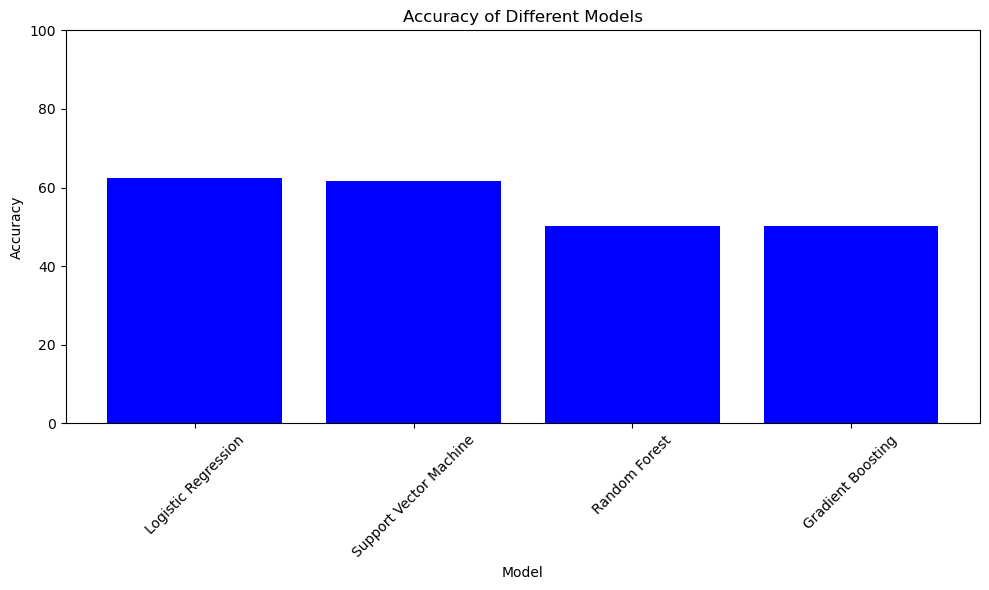

In [27]:
M.run_models()